In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [569]:
data = pd.read_csv('LogisticRegression.csv')

In [570]:
data.head(1000)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2011-09-22,Albury,4.4,22.1,0.0,NaN,NaN,ENE,30.0,E,...,81.0,36.0,1023.4,1017.4,NaN,NaN,12.6,21.9,No,No
996,2011-09-23,Albury,10.0,18.4,0.0,NaN,NaN,W,35.0,W,...,65.0,39.0,1017.9,1018.1,NaN,NaN,14.5,17.8,No,No
997,2011-09-24,Albury,1.9,18.3,0.0,NaN,NaN,SE,37.0,ESE,...,69.0,39.0,1020.3,1016.3,NaN,NaN,11.8,17.9,No,No
998,2011-09-25,Albury,8.6,19.8,1.0,NaN,NaN,SSE,43.0,S,...,53.0,36.0,1022.2,1020.5,NaN,NaN,13.7,18.9,No,No


In [571]:
print(data.shape)

(145460, 23)


In [572]:
data.drop(['Date','Location','WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [573]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [574]:
data.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [575]:
data.fillna(data.mean(), inplace=True)
data.head(5)

/var/folders/cy/181fsrcd4nsc5l8wfkgjgdsm0000gn/T/ipykernel_16902/1391516180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [576]:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [577]:
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


In [578]:
x = x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

/Users/anirudha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/anirudha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


In [579]:
# x_train=x.iloc[0:113754,:]

In [580]:
#x_train.shape

In [581]:
#y_train=x.iloc[0:113754,16]

In [582]:
#y_train.shape

In [583]:
#x_test=x.iloc[113754:,:]

In [584]:
#x_test.shape

In [585]:
#y_test=x.iloc[113754:,16]

In [586]:
#y_test.shape

In [587]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)


In [588]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [589]:
print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (17, 116368)
y_train shape is:  (116368,)
x_test shape is:  (17, 29092)
y_test shape is:  (29092,)


In [590]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [591]:
pd.Index.size=113754

In [592]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

In [593]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [594]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    loss = ((-(1 - y_train) )* np.log(1 - y_head)) - (y_train * np.log(y_head))     # loss function formula
    cost = (np.sum(loss)) / (x_train.shape[1] -1)                              # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

In [595]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Initialize for-back propagation for the number of iteration times. Then updating w and b values and writing the cost values to a list:  
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

In [596]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

In [597]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Cost after iteration 0: 0.711802
Cost after iteration 20: 0.526763
Cost after iteration 40: 0.511335
Cost after iteration 60: 0.500550
Cost after iteration 80: 0.491209
Cost after iteration 100: 0.483038
Cost after iteration 120: 0.475871
Cost after iteration 140: 0.469566
Cost after iteration 160: 0.463999
Cost after iteration 180: 0.459065
Cost after iteration 200: 0.454672
Cost after iteration 220: 0.450744
Cost after iteration 240: 0.447214
Cost after iteration 260: 0.444028
Cost after iteration 280: 0.441139
Cost after iteration 300: 0.438506
Cost after iteration 320: 0.436096
Cost after iteration 340: 0.433880
Cost after iteration 360: 0.431835
Cost after iteration 380: 0.429939
Cost after iteration 400: 0.428175
Cost after iteration 420: 0.426528
Cost after iteration 440: 0.424984
Cost after iteration 460: 0.423532
Cost after iteration 480: 0.422164
Cost after iteration 500: 0.420870
Cost after iteration 520: 0.419644
Cost after iteration 540: 0.418478
Cost after iteration 560: 

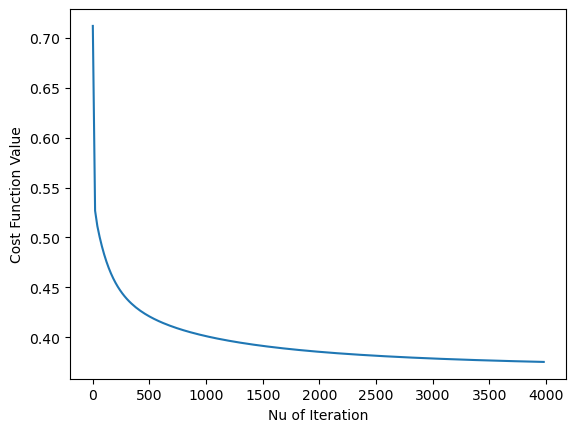

Test accuracy: 83.31843805857281%


In [598]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.1, nu_of_iteration=4000)